# Plot warning's geometry

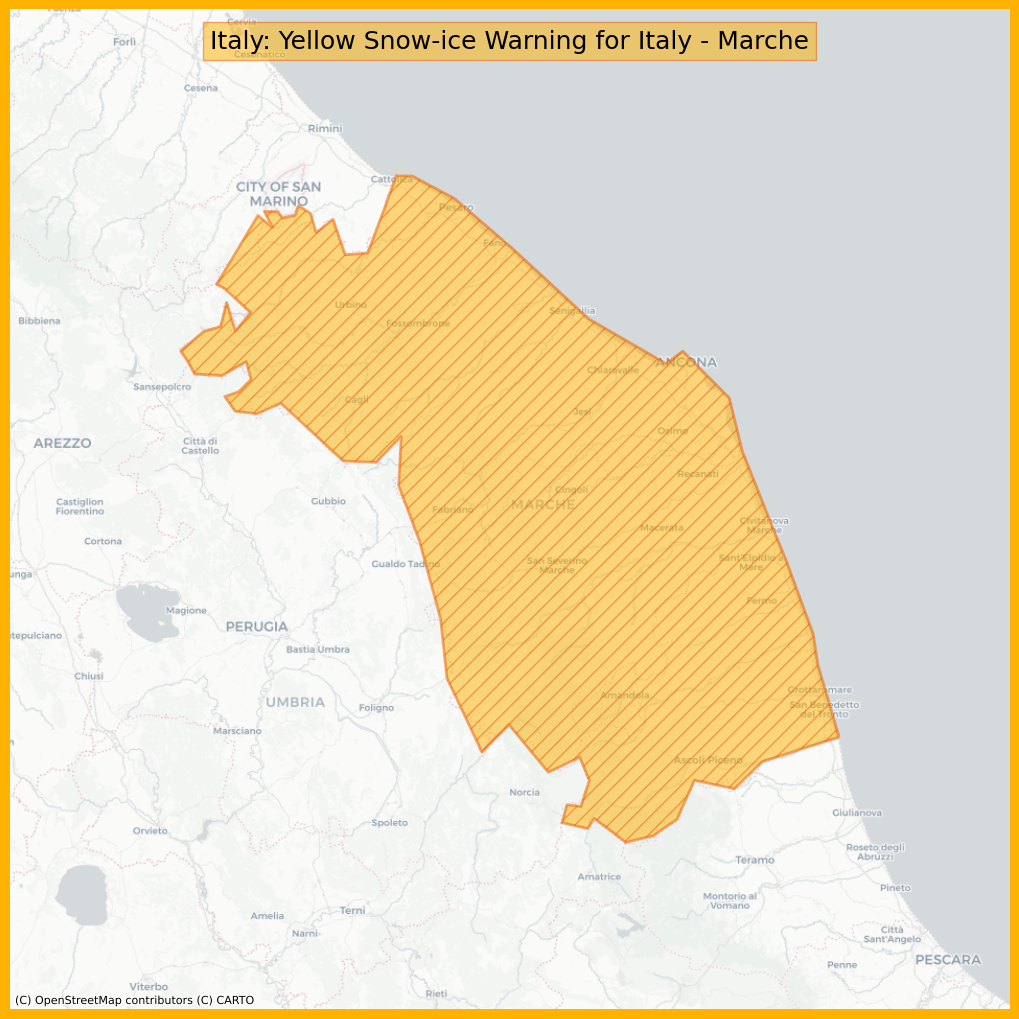

In [214]:
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import json

warning = warnings[27]

if warning.severity == 'Severe':
    facecolor = "#FF204E"
    edgecolor = "#A0153E"
elif warning.severity == 'Moderate':
    facecolor = "#FFB200"
    edgecolor = "#EB5B00"

def calculate_zoomed_squared_extent(gdf, zoom_out_factor=1.5):
    bounds = gdf.total_bounds
    x_min, y_min, x_max, y_max = bounds
    x_range = x_max - x_min
    y_range = y_max - y_min
    max_range = max(x_range, y_range) * zoom_out_factor

    x_center = (x_max + x_min) / 2
    y_center = (y_max + y_min) / 2

    x_min_new = x_center - max_range / 2
    x_max_new = x_center + max_range / 2
    y_min_new = y_center - max_range / 2
    y_max_new = y_center + max_range / 2

    return x_min_new, x_max_new, y_min_new, y_max_new

# Parse the GeoJSON string
geojson_dict = json.loads(warning.geometry)

# Create geometry object
geometry = shape(geojson_dict)

# Create GeoDataFrame directly
gdf = gpd.GeoDataFrame(geometry=[geometry], crs="EPSG:4326")

# Convert to Web Mercator projection for contextily
gdf_web = gdf.to_crs(epsg=3857)

# Calculate squared extent
x_min_new, x_max_new, y_min_new, y_max_new = calculate_zoomed_squared_extent(gdf_web)

# Create plot with custom background color
fig, ax = plt.subplots(figsize=(10, 10), facecolor=facecolor)
gdf_web.plot(ax=ax, alpha=0.5, edgecolor=edgecolor, facecolor=facecolor, hatch='//', linewidth=2)

# Set new squared extent
ax.set_xlim([x_min_new, x_max_new])
ax.set_ylim([y_min_new, y_max_new])

# Add background map with a different basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Add title above the map
plt.suptitle(warning.country.title() + ": " + warning.get_headline(), 
             bbox=dict(facecolor=facecolor, edgecolor=edgecolor, alpha=0.5, pad=5), 
             fontsize=18)

plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])
fig.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)
ax.set_position([0, 0, 1, 1])
plt.show()